In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
amazon = pd.read_pickle("amazon_genres.pkl")

In [3]:
amazon.dtypes

show                object
year                 int64
rating              object
imdb               float64
rotten_tomatoes     object
tconst              object
titleType           object
primaryTitle        object
originalTitle       object
isAdult            float64
startYear          float64
endYear            float64
runtimeMinutes      object
genres              object
Crime                int32
Drama                int32
Thriller             int32
Action               int32
History              int32
Adventure            int32
Comedy               int32
Mystery              int32
Sci-Fi               int32
Horror               int32
Romance              int32
Family               int32
Fantasy              int32
Talk-Show            int32
Game-Show            int32
Reality-TV           int32
Music                int32
Musical              int32
Animation            int32
War                  int32
Sport                int32
Biography            int32
Documentary          int32
W

In [6]:
amazon["rating"].isna().value_counts()

True     1085
False     800
Name: rating, dtype: int64

In [5]:
amazon["rating"].value_counts()

7+     222
16+    209
all    188
18+    180
13+      1
Name: rating, dtype: int64

In [7]:
amazon["rating"] = [str(i).replace("+", "") for i in amazon["rating"]]

In [8]:
amazon["rating"] = np.where(amazon["rating"] == "all", 0, amazon["rating"])

In [9]:
amazon["rating"] = pd.to_numeric(amazon["rating"], errors="coerce")
amazon["runtimeMinutes"] = pd.to_numeric(amazon["runtimeMinutes"], errors="coerce")

In [11]:
amazon["rating"].describe()

count    800.000000
mean      10.188750
std        7.059775
min        0.000000
25%        7.000000
50%        7.000000
75%       16.000000
max       18.000000
Name: rating, dtype: float64

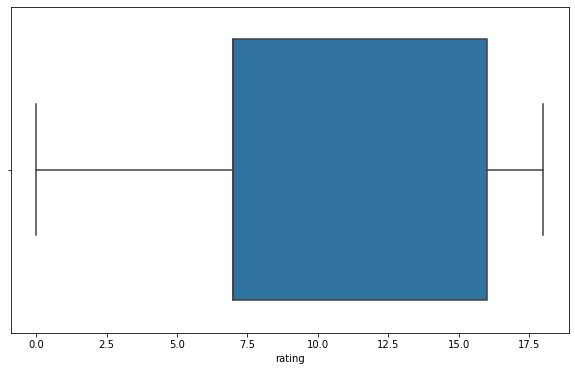

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(amazon["rating"])

In [13]:
amazon["runtimeMinutes"].describe()

count    1216.000000
mean       62.396382
std        87.807810
min         1.000000
25%        26.000000
50%        42.000000
75%        60.000000
max      1140.000000
Name: runtimeMinutes, dtype: float64

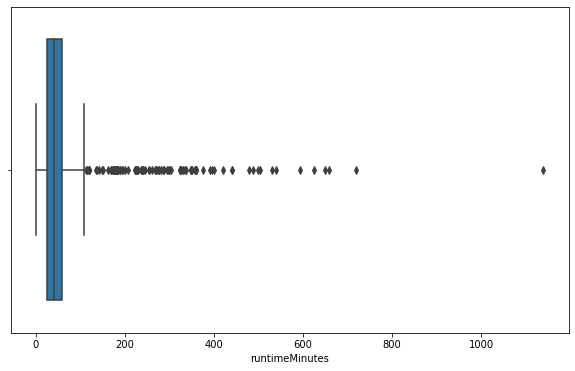

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(amazon["runtimeMinutes"])

(0, 100)

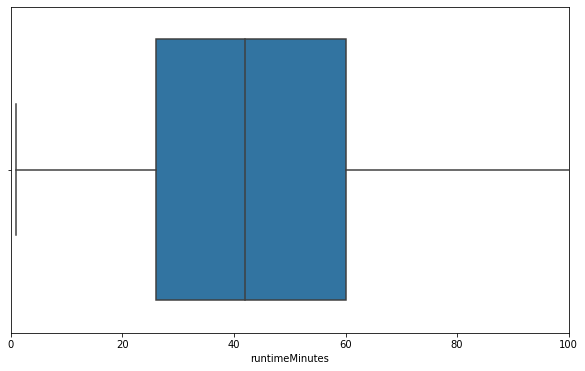

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(amazon["runtimeMinutes"])
ax.set_xlim(0, 100)

In [16]:
amazon["startYear"].describe()

count    1799.000000
mean     2006.975542
std        13.568000
min      1947.000000
25%      2004.000000
50%      2012.000000
75%      2016.000000
max      2020.000000
Name: startYear, dtype: float64

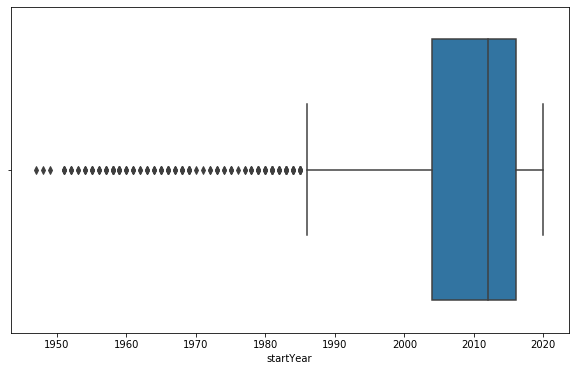

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(amazon["startYear"])

(1980, 2020)

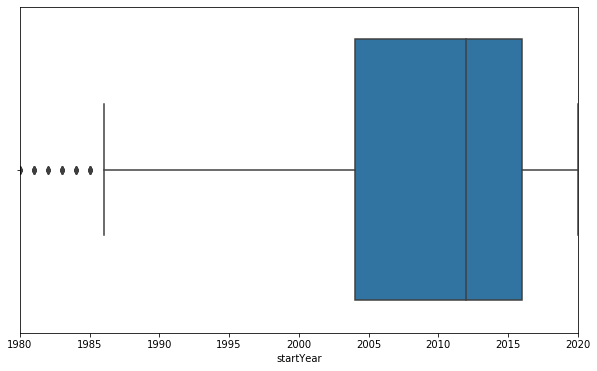

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(amazon["startYear"])
ax.set_xlim(1980, 2020)

In [19]:
ratings = pd.read_csv("C:/Users/Admin/Documents/ironhack/title.ratings.tsv.gz", sep="\t")

In [20]:
amazon = amazon.merge(ratings, how="left", on="tconst")

In [21]:
amazon = amazon.drop(columns="numVotes")

In [22]:
amazon["averageRating"].describe()

count    1578.000000
mean        7.136692
std         1.167784
min         1.600000
25%         6.600000
50%         7.300000
75%         7.900000
max         9.900000
Name: averageRating, dtype: float64

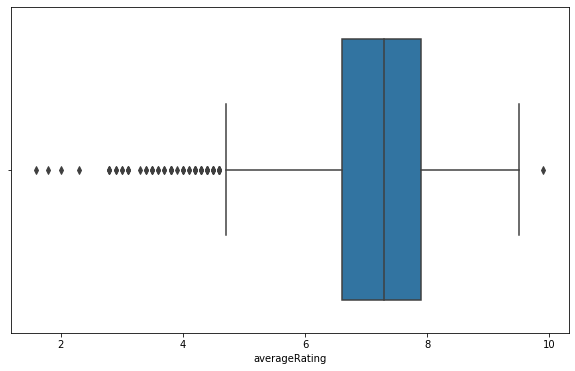

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(amazon["averageRating"])

In [27]:
amazon[amazon["averageRating"] < 5].sort_values("averageRating").head(20)

,show,year,rating,imdb,rotten_tomatoes,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Crime,Drama,Thriller,Action,History,Adventure,Comedy,Mystery,Sci-Fi,Horror,Romance,Family,Fantasy,Talk-Show,Game-Show,Reality-TV,Music,Musical,Animation,War,Sport,Biography,Documentary,Western,Short,News,Adult,averageRating
1770,Blue Realm,2017,NaN,NaN,NaN,tt1863530,tvSeries,Be Real,Be Real,0.0,2006.0,2006.0,NaN,Comedy,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6
1140,Toddlers & Tiaras,2009,7.0,1.8,NaN,tt1364951,tvSeries,Toddlers & Tiaras,Toddlers and Tiaras,0.0,2009.0,2009.0,NaN,Reality-TV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.8
625,The High Fructose Adventures of Annoying Orange,2012,7.0,2.0,NaN,tt2114184,tvSeries,The High Fructose Adventures of Annoying Orange,The High Fructose Adventures of Annoying Orange,0.0,2012.0,2012.0,30.0,"Action,Adventure,Animation",0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0
900,Strange Love,2005,NaN,2.3,NaN,tt0429438,tvSeries,Strange Love,Strange Love,0.0,2005.0,2005.0,60.0,"Comedy,Reality-TV,Romance",0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.3
1313,Origins,2017,NaN,NaN,NaN,tt2572958,tvSeries,Origins,Origins,0.0,1985.0,1985.0,30.0,Talk-Show,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2.8
877,The Z Virus,2017,NaN,2.8,NaN,tt5937940,tvSeries,The Z Virus,The Z Virus,0.0,2017.0,2017.0,10.0,Horror,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.8
959,ViR: The Robot Boy,2013,NaN,2.8,NaN,tt8242412,tvSeries,ViR: The Robot Boy,ViR: The Robot Boy,0.0,2013.0,2013.0,NaN,"Animation,Comedy,Family",0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.8
1600,World's Funniest Moments,2008,NaN,2.9,NaN,tt1291098,tvSeries,The World's Funniest Moments,The World's Funniest Moments,0.0,2008.0,2008.0,60.0,Reality-TV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.9
652,The Annoying Orange,2009,7.0,NaN,NaN,tt1715368,tvSeries,The Annoying Orange,The Annoying Orange,0.0,2009.0,2009.0,NaN,"Comedy,Family,Fantasy",0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.9
1283,Paranormal Egypt,2008,NaN,3.0,NaN,tt1535270,tvSeries,Paranormal Egypt,Paranormal Egypt,0.0,2007.0,2007.0,NaN,Reality-TV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3.0


In [28]:
(amazon[amazon["averageRating"] < 5]).shape[0] / amazon.shape[0]

0.041379310344827586